# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations: We are looking at 1898 different orders.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There is 1 float, 4 integers, and 4 objects within this dataset columns.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There are no missing values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df['food_preparation_time'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


#### Observations: The minimum time it takes for food to be prepared once an order is place is 20 minutes. The maximum time is 35 minutes. The average time is 27.371970 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
not_rated = df['rating'].isnull().sum()

print("Number of orders not rated:", not_rated)

Number of orders not rated: 0


#### Observations: Every order is rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

1898 1200 178 14 2 4


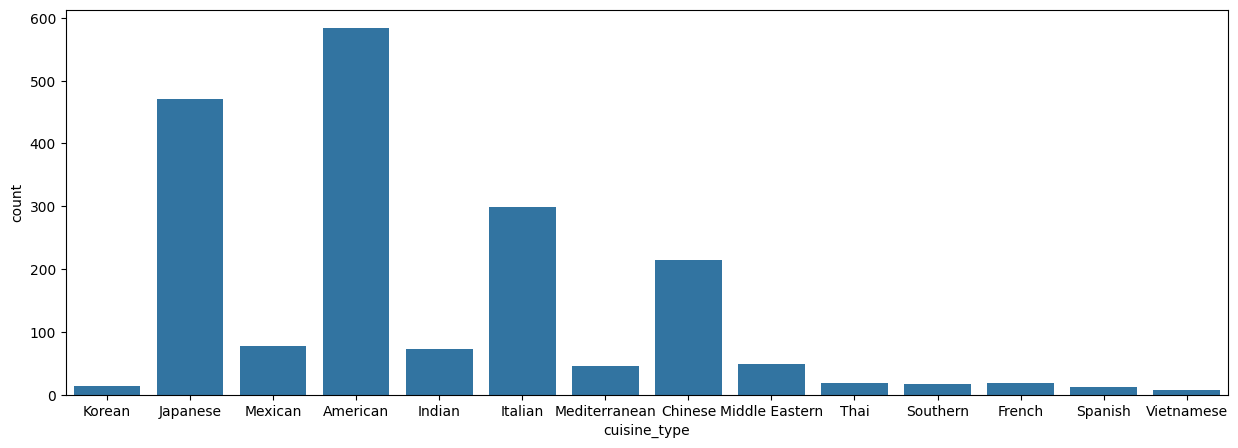

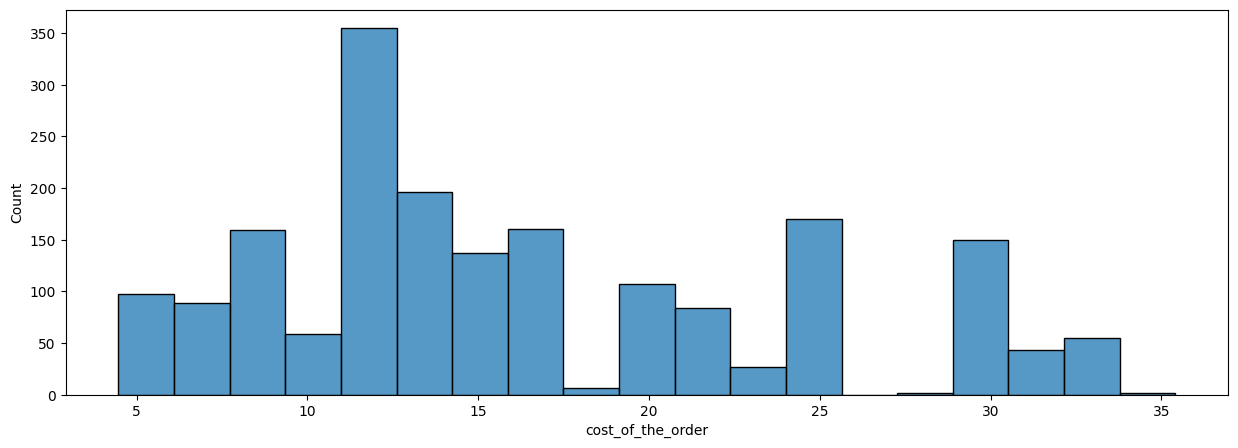

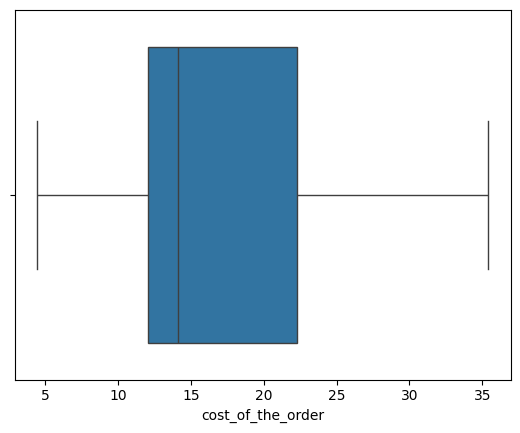

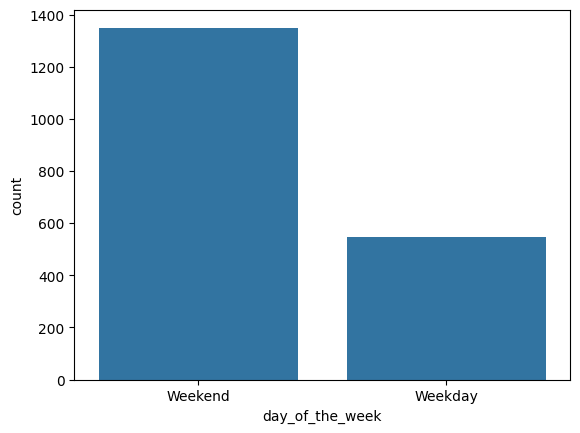

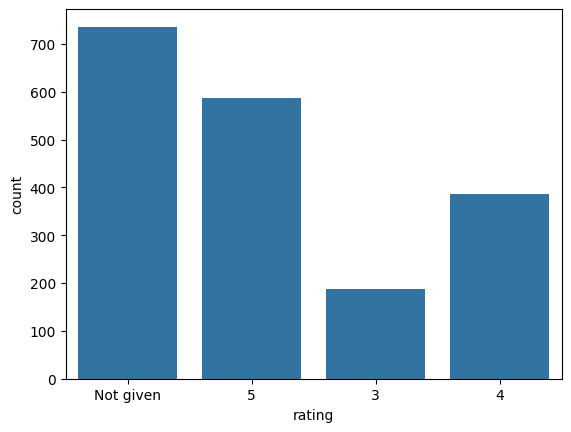

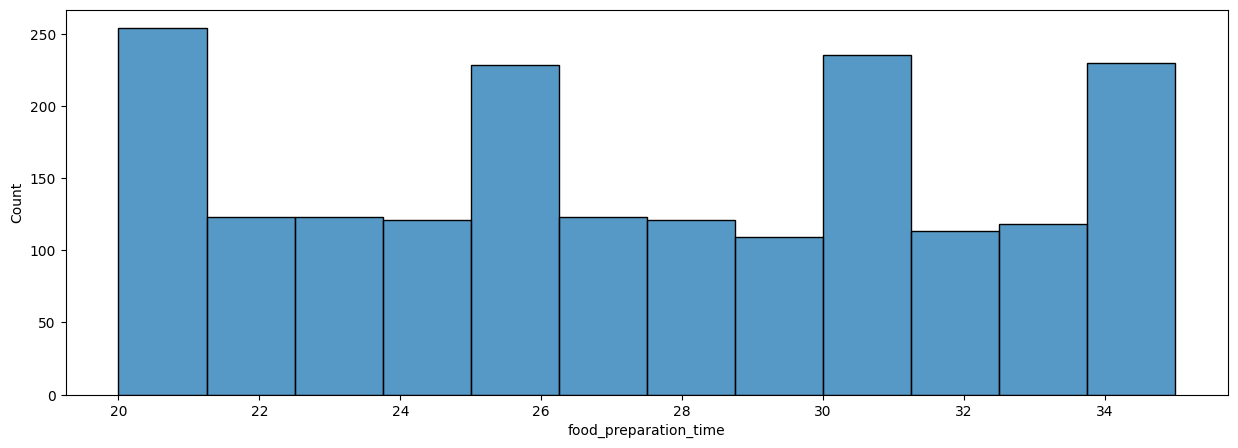

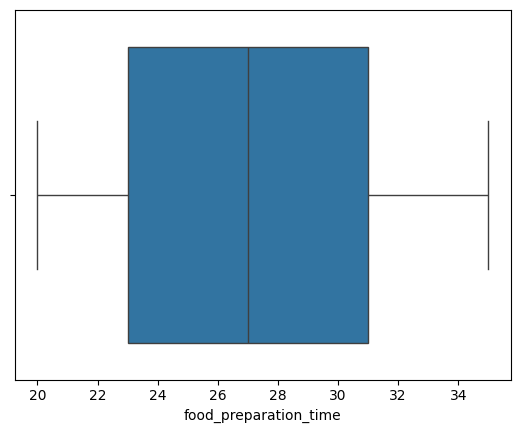

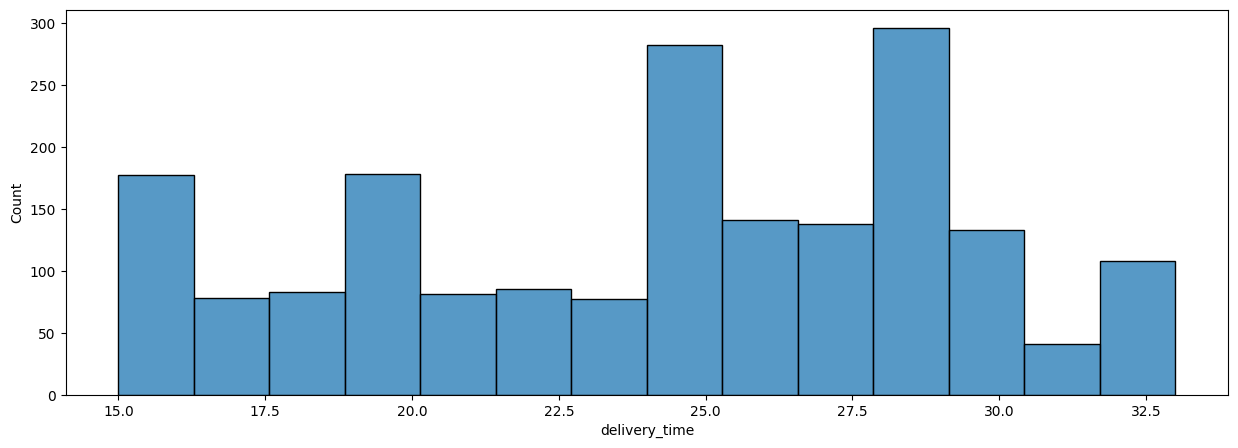

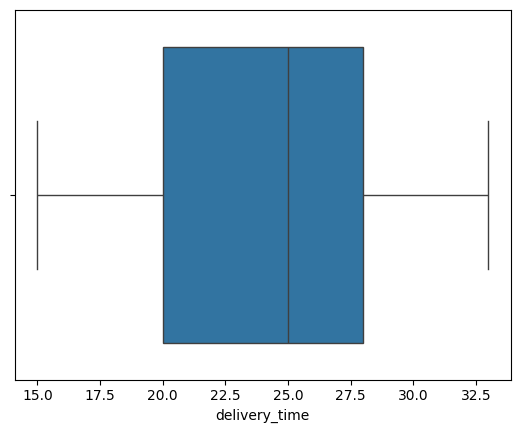

In [ ]:
# Write the code here
orders = df['order_id'].nunique()
ids = df['customer_id'].nunique()
names = df['restaurant_name'].nunique()
types = df['cuisine_type'].nunique()
days = df['day_of_the_week'].nunique()
rating = df['rating'].nunique()

print(orders, ids, names, types, days, rating) # printing how many unique items are in each column listed above

#cuisine type plot
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

#cost of order
plt.figure(figsize = (15,5))
sns.histplot(data=df,x='cost_of_the_order') # Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') # Boxplot for the cost of order
plt.show()

#day of the week
plt.figure()
sns.countplot(data = df, x = 'day_of_the_week') # Bar graph for 'day_of_the_week' column

#rating
plt.figure()
sns.countplot(data = df, x = 'rating') # Bar graph for 'rating' column

#food prep time
plt.figure(figsize = (15,5))
sns.histplot(data=df,x='food_preparation_time') # Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='food_preparation_time') # Boxplot for the cost of order
plt.show()

#delivery time
plt.figure(figsize = (15,5))
sns.histplot(data=df,x='delivery_time') # Histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time')  # Boxplot for the delivery time
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df['restaurant_name'].head()

,restaurant_name
0,Hangawi
1,Blue Ribbon Sushi Izakaya
2,Cafe Habana
3,Blue Ribbon Fried Chicken
4,Dirty Bird to Go


#### Observations: Hangawi, Blue Ribbon Shushi Izakaya, Cafe Habana, Blue Ribbon Fried Chicken, and Dirty Bird to Go are the most popular restaurants to order from in this data set.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].head()

,cuisine_type
0,Korean
1,Japanese
3,American
6,Italian
11,Mexican


#### Observations: Korean, Japanese, American, Italian, and Mexican are the most popular cuisines to order on the weekend from this data set.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
df_greater_than_20 = df[df['cost_of_the_order']>20]
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print(percentage, '%')

29.24130663856691 %


#### Observations: About 29% of orders cost more than $20.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
mean_del_time = df['delivery_time'].mean()
print(mean_del_time, 'minutes')

24.161749209694417 minutes


#### Observations: The mean order delivery time is around 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations: These are the 3 most frequen customers. They have ordered 13, 10, and 9 times respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


/tmp/ipython-input-4200474610.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')


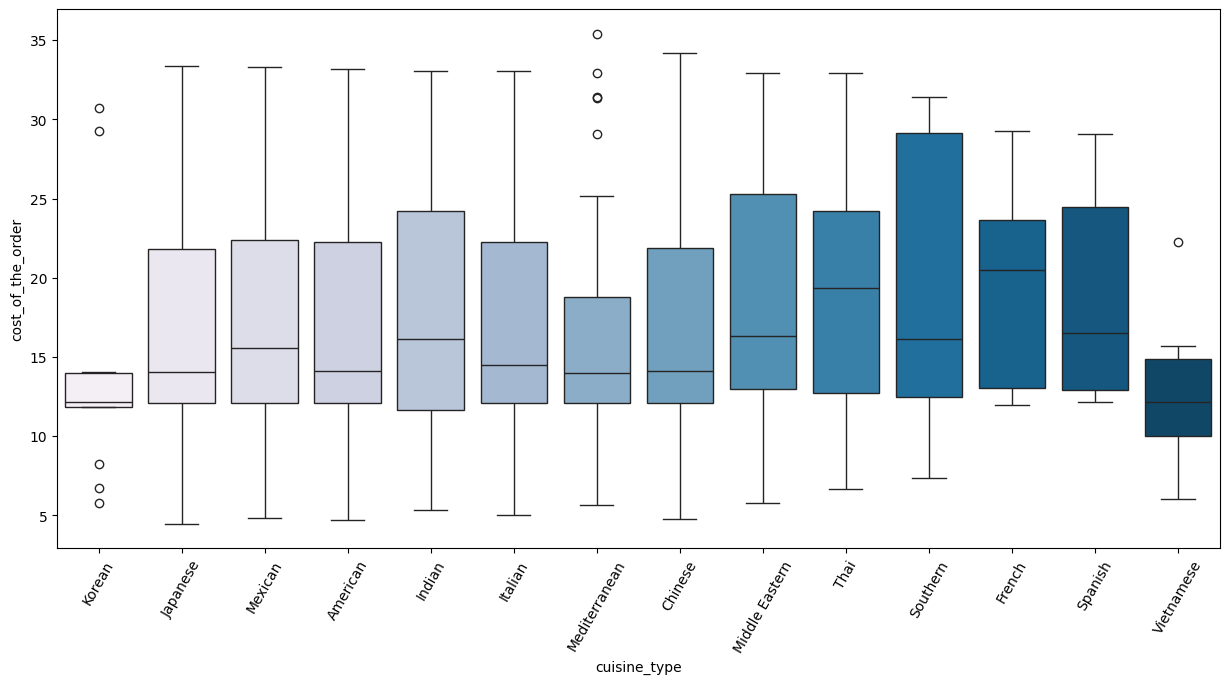

/tmp/ipython-input-4200474610.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')


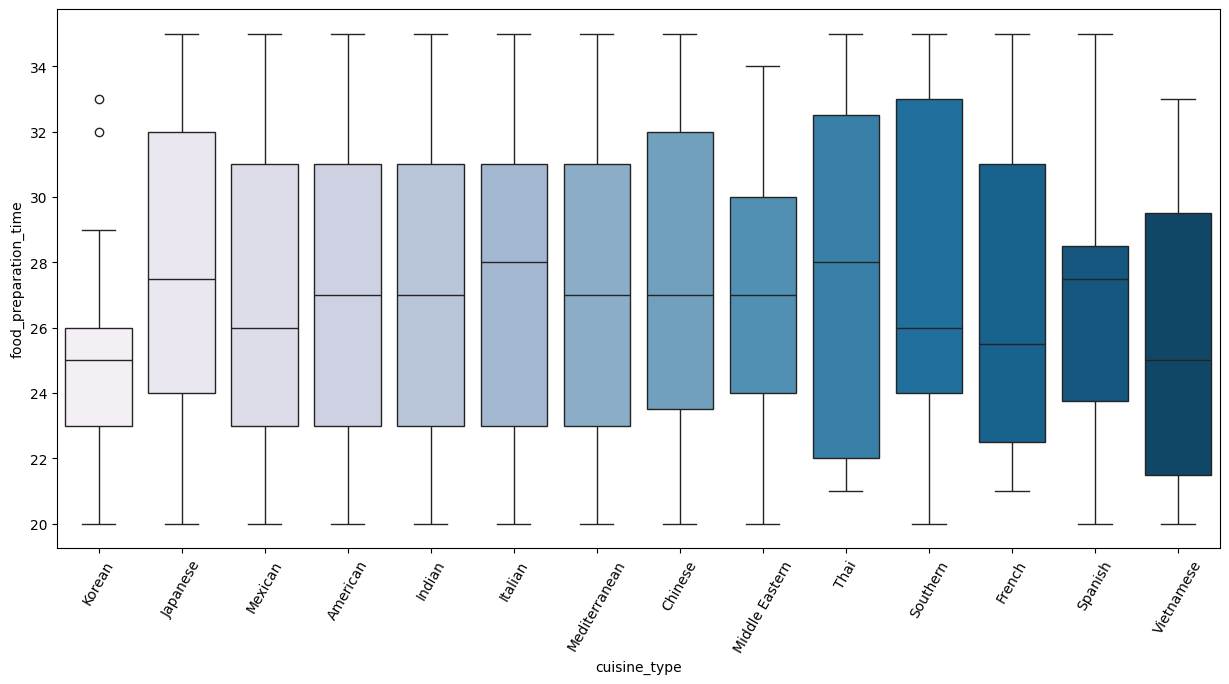

/tmp/ipython-input-4200474610.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')


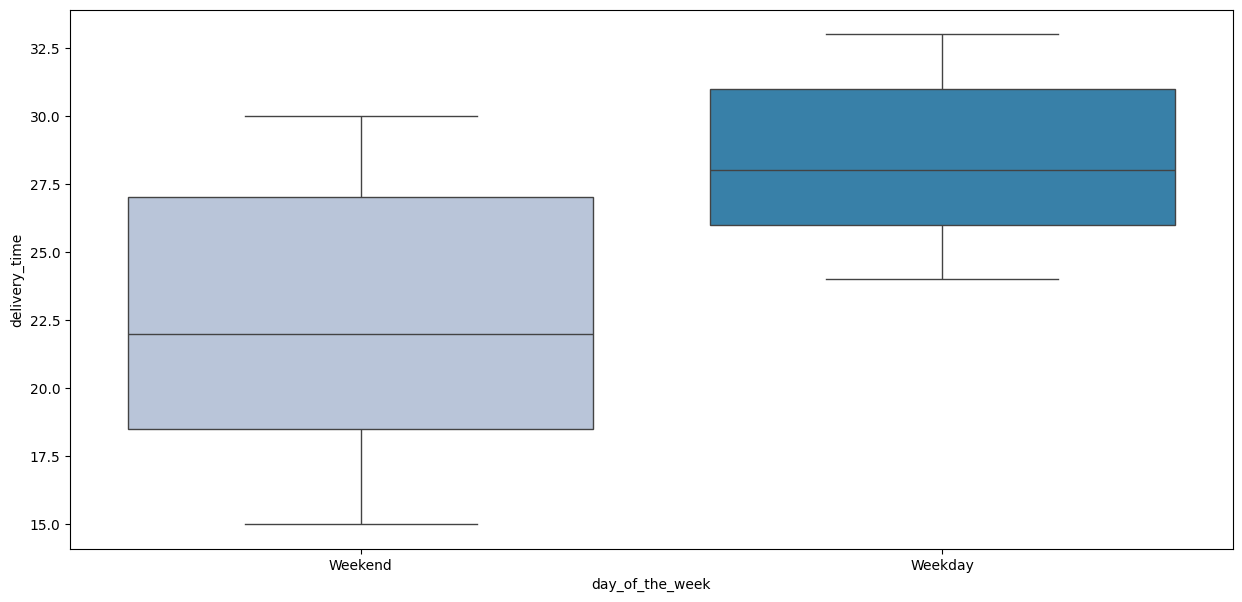

In [ ]:
# Write the code here

# Relationship between cost of the order and cuisine type represented by a boxplot
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

# Relationship between food preparation time and cuisine type respresented by a boxplot
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

# Relationship between day of the week and delivery time respresented by a boxplot
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')
plt.show()

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


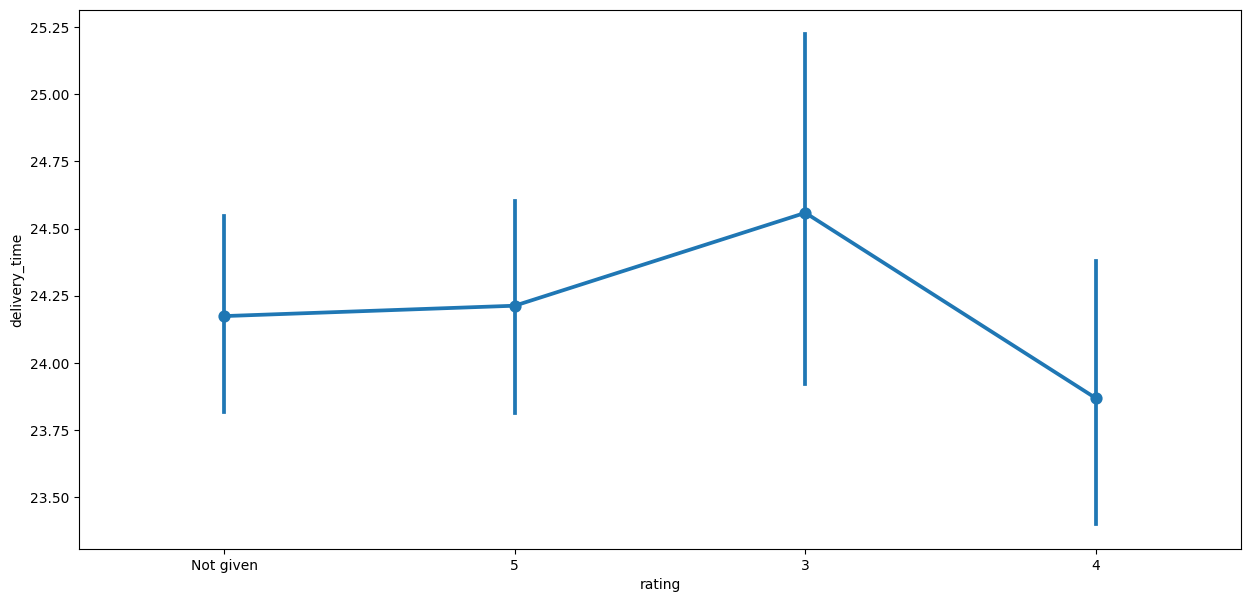

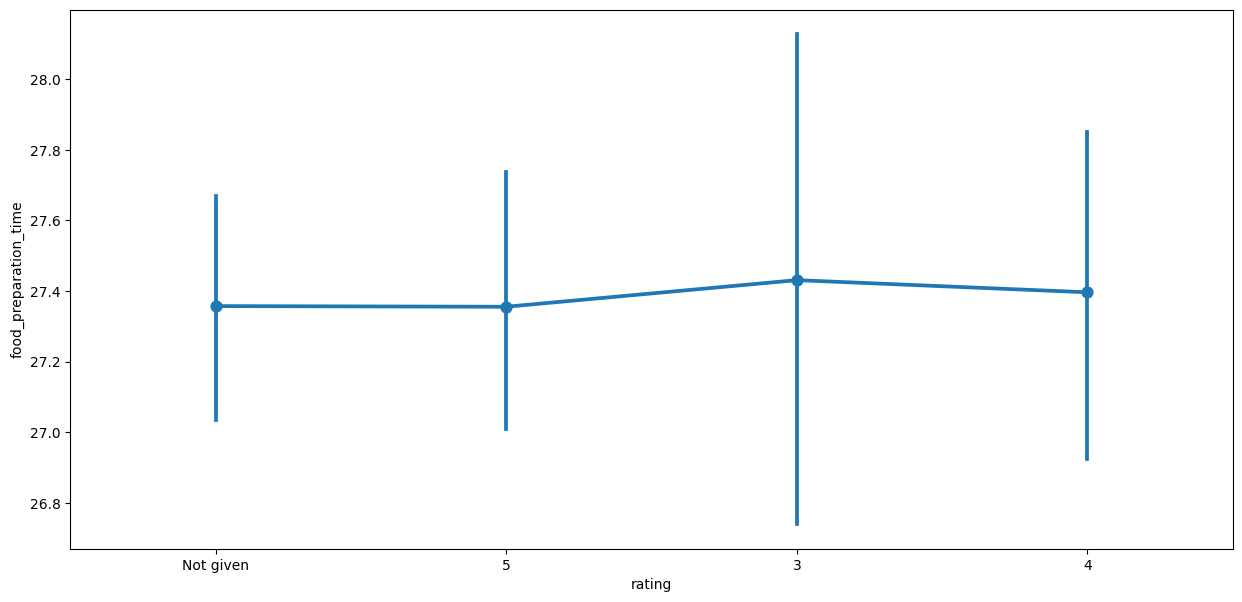

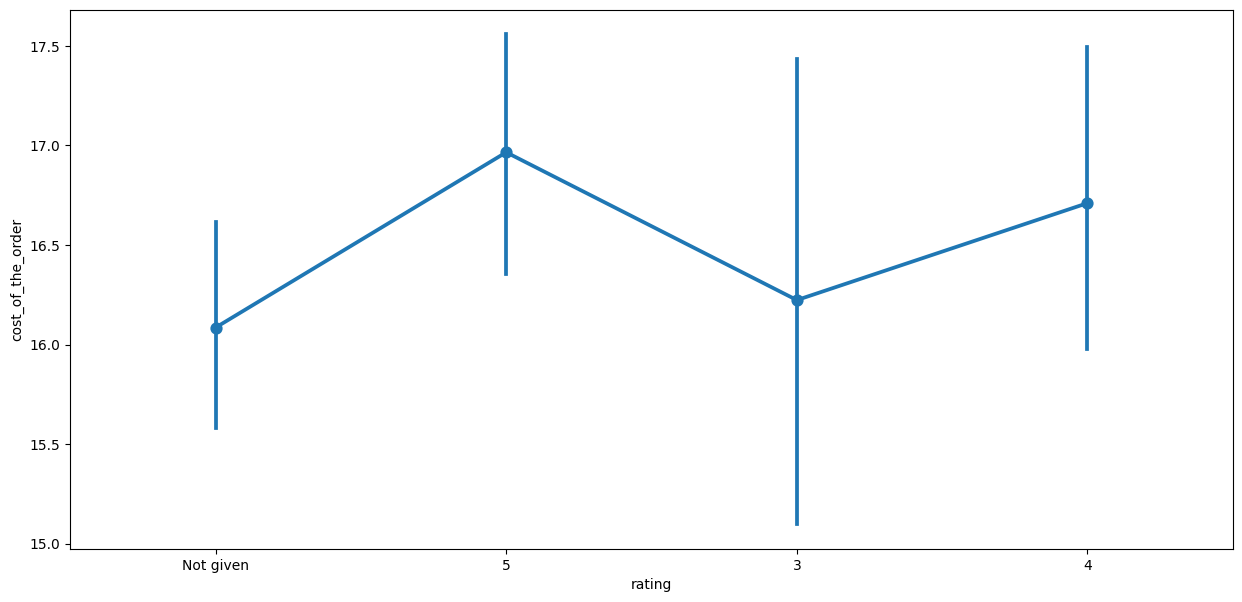

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  # Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   # Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

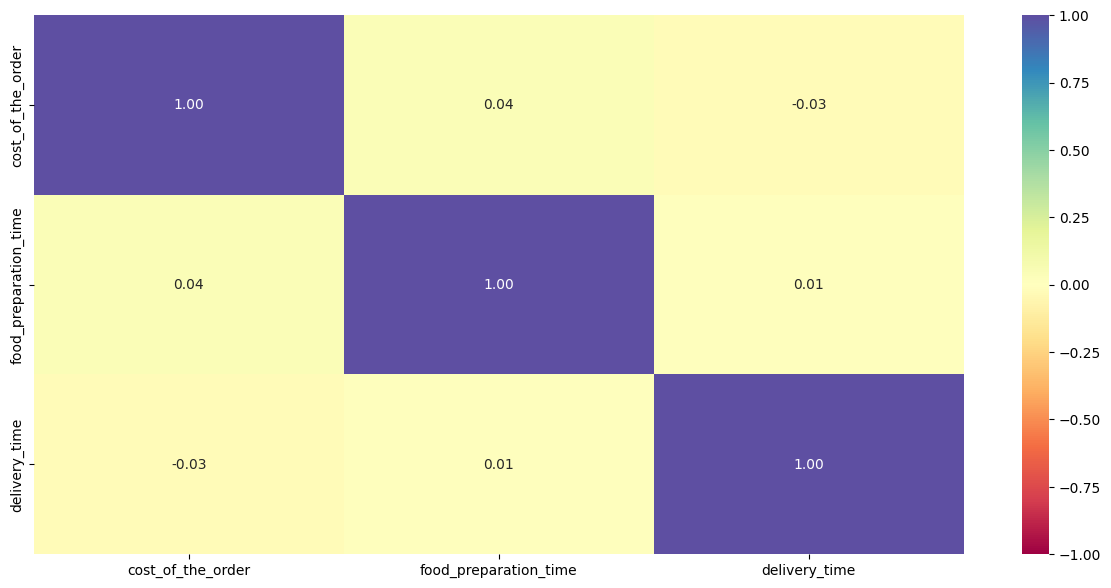

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations: While Shake Shack has the most ratings above 4, The Meatball Shop has the highest average ratings.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) # Write the apprpriate column name to compute the revenue
df.head()

total_rev = df['Revenue'].sum() # Write the appropriate function to get the total revenue
print(total_rev, 'dollars')

6166.303 dollars


#### Observations: The net revenue generated by the company across all orders is $6166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df_more_than_60 = df[df['total_time'] > 60]

# Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
percentage = (df_more_than_60.shape[0] / df.shape[0]) * 100

print(percentage, "%")

10.537407797681771 %


#### Observations: About 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

# Get the mean delivery time on weekdays and print it
x = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# Write the code below to get the mean delivery time on weekends and print it
y = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print(x, y, x-y)

28.340036563071298 22.4700222057735 5.870014357297798


#### Observations: During the week, the mean delivery time is about 28.3 minutes. During the weekend, the mean delivery time is about 22.47 minutes. Thus, deliveries are about 5.87 minutes faster on the weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The minimum time it takes for food to be prepared once an order is place is 20 minutes. The maximum time is 35 minutes. The average time is 27.371970 minutes.
* Hangawi, Blue Ribbon Shushi Izakaya, Cafe Habana, Blue Ribbon Fried Chicken, and Dirty Bird to Go are the most popular restaurants to order from in this data set.
* About 29% of orders cost more than $20.

* Korean, Japanese, American, Italian, and Mexican are the most popular cuisines to order on the weekend from this data set.
* The mean order delivery time is around 24.16 minutes.
* While Shake Shack has the most ratings above 4, The Meatball Shop has the highest average ratings.
* About 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.
* During the week, the mean delivery time is about 28.3 minutes. During the weekend, the mean delivery time is about 22.47 minutes. Thus, deliveries are about 5.87 minutes faster on the weekends.

* Lower delivery times yield better ratings.

### Recommendations:

* While it is good to reward the most active users, there should also be incentives for users to buy from less popular restaurants and slower delivery times.
* More popular cuisines should have less incentives. Since there does not seem to be a correlation between price and delivery time, it means users are actively seeking out these cuisines.

---